<a href="https://www.kaggle.com/code/vanpatangan/predict-future-sales?scriptVersionId=222370958" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# import libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# load data

In [2]:
sales_train = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
items = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/items.csv')
item_categories = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
shops = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
test_df = pd.read_csv('/kaggle/input/competitive-data-science-predict-future-sales/test.csv')

# data summary

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        'duplicates': duplicates  
    })

    return df_check

print("Sales Train")
display(check(sales_train))
display(sales_train.head())

print("Items")
display(check(items))
display(items.head())

print("Item Categories")
display(check(item_categories))
display(item_categories.head())

print("Shops")
display(check(shops))
display(shops.head())

print("Test")
display(check(test_df))
display(test_df.head())

Sales Train


,column,dtype,instances,unique,sum_null,duplicates
date,date,object,2935849,1034,0,6
date_block_num,date_block_num,int64,2935849,34,0,6
shop_id,shop_id,int64,2935849,60,0,6
item_id,item_id,int64,2935849,21807,0,6
item_price,item_price,float64,2935849,19993,0,6
item_cnt_day,item_cnt_day,float64,2935849,198,0,6


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,1709.05,1.00
4,15.01.2013,0,25,2555,1099.00,1.00


Items


,column,dtype,instances,unique,sum_null,duplicates
item_name,item_name,object,22170,22170,0,0
item_id,item_id,int64,22170,22170,0,0
item_category_id,item_category_id,int64,22170,84,0,0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Item Categories


,column,dtype,instances,unique,sum_null,duplicates
item_category_name,item_category_name,object,84,84,0,0
item_category_id,item_category_id,int64,84,84,0,0


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Shops


,column,dtype,instances,unique,sum_null,duplicates
shop_name,shop_name,object,60,60,0,0
shop_id,shop_id,int64,60,60,0,0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Test


,column,dtype,instances,unique,sum_null,duplicates
ID,ID,int64,214200,214200,0,0
shop_id,shop_id,int64,214200,42,0,0
item_id,item_id,int64,214200,5100,0,0


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# merge

In [4]:

def merge_dataframes(base_df, shops_df, items_df, item_categories_df):
    """
    Merge multiple dataframes 
    """
    merged_df = (base_df
                 .merge(shops_df, on='shop_id', how='left')
                 .merge(items_df, on='item_id', how='left')
                 .merge(item_categories_df, on='item_category_id', how='left'))
    
    return merged_df.drop_duplicates().reset_index(drop=True)

# Merge sales_train_df with the relevant dataframes
train = merge_dataframes(sales_train, shops, items, item_categories)

# Merge test_df with the relevant dataframes
test = merge_dataframes(test_df, shops, items, item_categories)

print(f"Shape of train after merges: {train.shape}")
print(f"Shape of test after merges: {test.shape}")

Shape of train after merges: (2935843, 10)
Shape of test after merges: (214200, 7)


In [5]:
# Convert date column to datetime 
train['date'] = pd.to_datetime(train['date'], dayfirst=True)

# EDA visualization

In [ ]:
# Distribution plots for item_price and item_cnt_day
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(train['item_price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Item Price')
axes[0].set_xlabel('Item Price')

sns.histplot(train['item_cnt_day'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Item Count per Day')
axes[1].set_xlabel('Item Count per Day')

plt.tight_layout()
plt.show()

In [ ]:
# Boxplots for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=train['item_price'], ax=axes[0])
axes[0].set_title('Boxplot of Item Price')

sns.boxplot(y=train['item_cnt_day'], ax=axes[1])
axes[1].set_title('Boxplot of Item Count per Day')

plt.tight_layout()
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = train[['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Total sales per month
monthly_sales = train.groupby('date_block_num')['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='date_block_num', y='item_cnt_day')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Date Block Number')
plt.ylabel('Total Sales')
plt.show()

# Top 10 shops by total sales
top_shops = train.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
top_shops.plot(kind='bar', figsize=(10, 6), title='Top 10 Shops by Sales')
plt.ylabel('Total Sales')
plt.show()

# Top 10 categories by total sales
top_categories = train.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', figsize=(10, 6), title='Top 10 Categories by Sales')
plt.ylabel('Total Sales')
plt.show()

# handle outliers

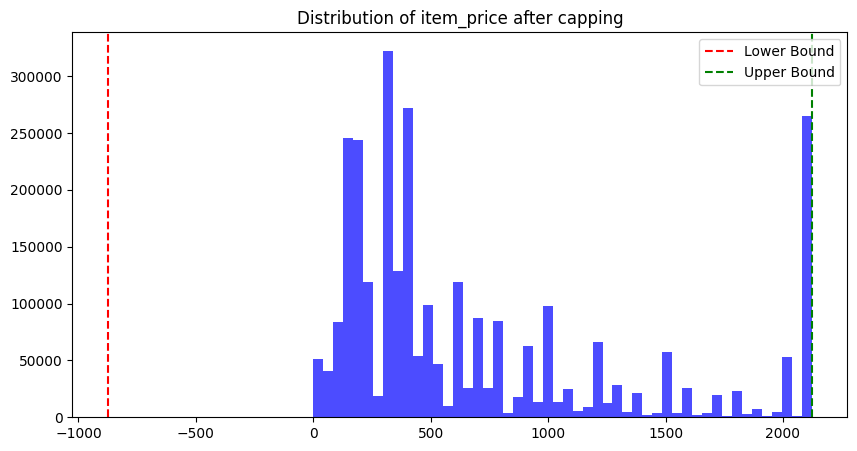

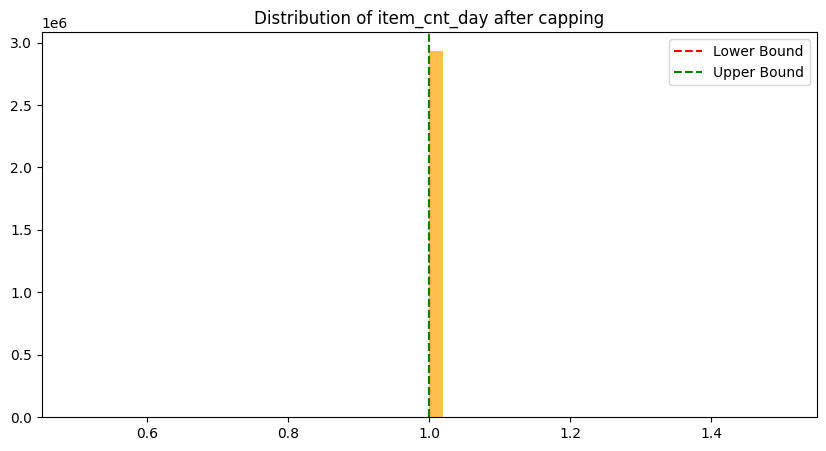

In [6]:
# Calculate IQR for item_price
Q1_price = train['item_price'].quantile(0.25)
Q3_price = train['item_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5 * IQR_price
price_upper = Q3_price + 1.5 * IQR_price

# Calculate IQR for item_cnt_day
Q1_cnt = train['item_cnt_day'].quantile(0.25)
Q3_cnt = train['item_cnt_day'].quantile(0.75)
IQR_cnt = Q3_cnt - Q1_cnt
cnt_lower = Q1_cnt - 1.5 * IQR_cnt
cnt_upper = Q3_cnt + 1.5 * IQR_cnt

# Cap outliers for item_price
train['item_price'] = train['item_price'].clip(lower=price_lower, upper=price_upper)

# Cap outliers for item_cnt_day
train['item_cnt_day'] = train['item_cnt_day'].clip(lower=cnt_lower, upper=cnt_upper)

# Plot for item_price
plt.figure(figsize=(10, 5))
plt.hist(train['item_price'], bins=50, color='blue', alpha=0.7)
plt.axvline(price_lower, color='red', linestyle='--', label='Lower Bound')
plt.axvline(price_upper, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribution of item_price after capping')
plt.legend()
plt.show()

# Plot for item_cnt_day
plt.figure(figsize=(10, 5))
plt.hist(train['item_cnt_day'], bins=50, color='orange', alpha=0.7)
plt.axvline(cnt_lower, color='red', linestyle='--', label='Lower Bound')
plt.axvline(cnt_upper, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribution of item_cnt_day after capping')
plt.legend()
plt.show()

# feature engineering

In [7]:
# Create target variable 'item_cnt_month'
train['item_cnt_month'] = train.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].transform('sum')

In [8]:
# Ensure date_block_num is numeric
train['date_block_num'] = train['date_block_num'].astype(int)

# Extract year and month from date_block_num for train
def create_time_features(df):
    df['year'] = df['date_block_num'] // 12
    df['month'] = df['date_block_num'] % 12
    df['is_start_of_year'] = (df['month'] == 0).astype(int)
    df['is_end_of_year'] = (df['month'] == 11).astype(int)
    return df

train = create_time_features(train)

# preprocess

In [13]:
def preprocess_data(train, test, target_var='item_cnt_month'):
    # Drop unnecessary columns
    drop_columns = ['shop_name', 'item_name', 'item_category_name']
    train = train.drop(columns=drop_columns, errors='ignore')
    test = test.drop(columns=drop_columns, errors='ignore')

    # Align columns
    test[target_var] = np.nan  # Use np.nan instead of None
    combined = pd.concat([train, test], axis=0, ignore_index=True)

    # Create a mask to identify test rows
    is_test = combined[target_var].isnull()

    # Fill NA with mean (excluding target_var)
    for col in combined.columns:
        if col != target_var:
            combined[col].fillna(combined[col].mean(), inplace=True)

    # Convert float columns to int64 (except target variable)
    for col in combined.select_dtypes(include='float').columns:
        if col != target_var:  # Skip conversion for the target variable
            combined[col] = combined[col].astype('int64')

    # Split back into train and test
    train = combined[~is_test]
    test = combined[is_test].drop(columns=[target_var])

    return train, test

train, test = preprocess_data(train, test)

In [17]:
# Fill NaN in date_block_num with the max value from train
#test['date_block_num'] = test['date_block_num'].fillna(train['date_block_num'].max()).astype(int)

# Drop unnecessary columns
drop_cols = ['date', 'ID']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)


# Define features and target
X_train = train.drop(columns=['item_cnt_month'])
y_train = train['item_cnt_month']
X_test = test.copy()  # Ensure test data aligns

# Ensure categorical columns are of type int (LightGBM handles categorical features automatically)
categorical_features = ['shop_id', 'item_id', 'item_category_id']
X_train[categorical_features] = X_train[categorical_features].astype('int64')
X_test[categorical_features] = X_test[categorical_features].astype('int64')

# Final Check
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("Missing values in train:", X_train.isnull().sum().sum())
print("Missing values in test:", X_test.isnull().sum().sum())


Train Shape: (2935843, 10)
Test Shape: (214200, 10)
Missing values in train: 0
Missing values in test: 0


# modeling

In [ ]:
""""
import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features to use
features = [ "date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", 
"item_category_id", "year", "month", "is_start_of_year", "is_end_of_year"
]

target = "item_cnt_month"

# Train-test split using time-based split (last month as validation)
train_data = train[train["date_block_num"] < train["date_block_num"].max()]
valid_data = train[train["date_block_num"] == train["date_block_num"].max()]

X_train, y_train = train_data[features], train_data[target]
X_valid, y_valid = valid_data[features], valid_data[target]

# Define the objective function for Optuna
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.1, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.1, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        "verbose": -1
    }

    # LightGBM Dataset
    train_set = lgb.Dataset(X_train, label=y_train)
    valid_set = lgb.Dataset(X_valid, label=y_valid, reference=train_set)

    # Define the early stopping callback
    early_stop = lgb.early_stopping(stopping_rounds=100)

    # Train the model
    model = lgb.train(
        params=params,
        train_set=train_set,
        valid_sets=[valid_set],
        num_boost_round=3000,
        callbacks=[early_stop]
    )

    # Predict on validation set
    y_pred_valid = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
    return rmse

# Create a study object and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Train the final model with the best parameters
best_params["objective"] = "regression"
best_params["metric"] = "rmse"
best_params["verbose"] = -1

train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_valid, label=y_valid, reference=train_set)

final_model = lgb.train(
    best_params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, valid_set],
    early_stopping_rounds=50
)

# Predict on validation set
y_pred_valid = final_model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred_valid, squared=False)
print(f"Final Validation RMSE: {rmse:.4f}")

# Feature importance
feature_importance = final_model.feature_importance(importance_type='gain')
feature_importance = sorted(zip(feature_importance, features), reverse=True)
print("\nTop 10 Important Features:")
for importance, feature in feature_importance[:10]:
    print(f"{feature}: {importance}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 2348674, number of used features: 9
[LightGBM] [Info] Start training from score 3.977395
Training until validation scores don't improve for 50 rounds
[10]	training's rmse: 3.68148	valid_1's rmse: 3.69018
[20]	training's rmse: 3.40119	valid_1's rmse: 3.41067
[30]	training's rmse: 3.28005	valid_1's rmse: 3.28929
[40]	training's rmse: 3.20334	valid_1's rmse: 3.21245
[50]	training's rmse: 3.13978	valid_1's rmse: 3.14859
[60]	training's rmse: 3.09634	valid_1's rmse: 3.10469
[70]	training's rmse: 3.06268	valid_1's rmse: 3.0713
[80]	training's rmse: 3.03625	valid_1's rmse: 3.04491
[90]	training's rmse: 3.00662	valid_1's rmse: 3.0155
[100]	training's rmse: 2.98174	valid_1's rmse: 2.

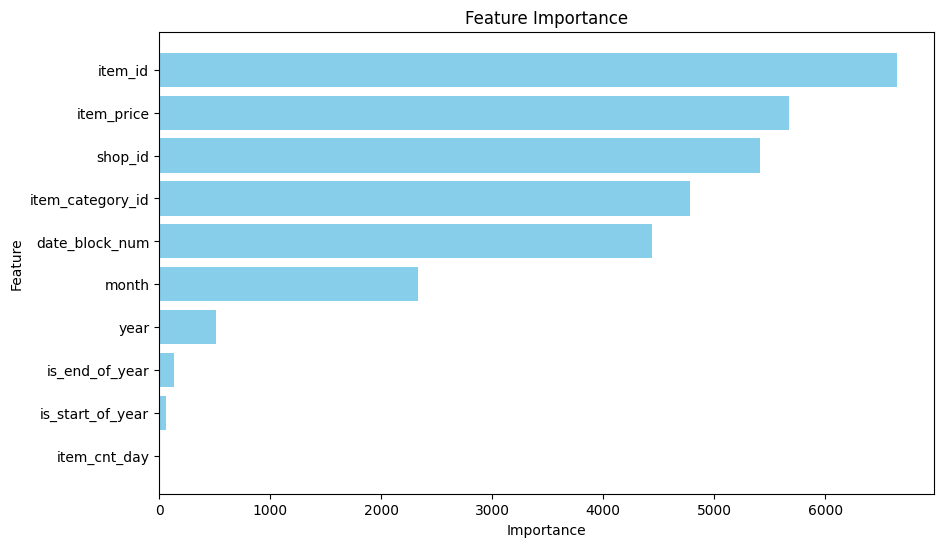

In [18]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target
features = ["date_block_num", "shop_id", "item_id", "item_price", "item_cnt_day", 
            "item_category_id", "year", "month", "is_start_of_year", "is_end_of_year"]
target = "item_cnt_month"

# Splitting data into train and validation sets
X = train[features]
y = train[target]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM dataset preparation
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Parameters for LightGBM
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "learning_rate": 0.1,
    "num_leaves": 31,
    "max_depth": -1,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
}

# Training the model with early stopping and logging callbacks
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),  # Early stopping after 50 rounds without improvement
        lgb.log_evaluation(period=10)           # Log evaluation every 10 rounds
    ]
)

# Predict on validation set
y_pred = model.predict(X_valid, num_iteration=model.best_iteration)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Validation RMSE: {rmse}")

# Feature importance
importance = model.feature_importance(importance_type="split")
feature_names = X_train.columns
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# predict on test set

In [ ]:
# Predict on the test dataset
test_pred = model.predict(test)

# submission

In [ ]:
# Save the predictions
predictions_df = pd.DataFrame({'id': id_df, 'item_cnt_month': test_pred})

# Save predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)

# Display the first few rows of the predictions
predictions_df.head()